# Task 4
By *Shivendra Singh Chauhan*
## @The Sparks Foundation - GRIP
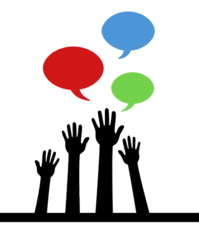

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('vader_lexicon')
import string


Using TensorFlow backend.
C:\Users\shiva\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\shiva\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\shiva\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\shiva\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

# Part 1
For Numerical analysis of **STOCK DATA**

In [3]:
df = web.DataReader('^BSESN', data_source = 'yahoo', start = '2012-01-01', end = '2020-10-04')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,15542.849609,15358.019531,15534.669922,15517.919922,14200.0,15517.919922
2012-01-03,15970.309570,15640.559570,15640.559570,15939.360352,16200.0,15939.360352
2012-01-04,16004.690430,15822.320312,15967.490234,15882.639648,17800.0,15882.639648
2012-01-05,15980.169922,15809.309570,15893.070312,15857.080078,21200.0,15857.080078
2012-01-06,16001.309570,15664.910156,15789.080078,15867.730469,17200.0,15867.730469
...,...,...,...,...,...,...
2020-09-25,37471.171875,36730.519531,36991.890625,37388.660156,13500.0,37388.660156
2020-09-28,38035.871094,37544.050781,37756.250000,37981.628906,13600.0,37981.628906
2020-09-29,38235.941406,37831.351562,38176.859375,37973.218750,10600.0,37973.218750


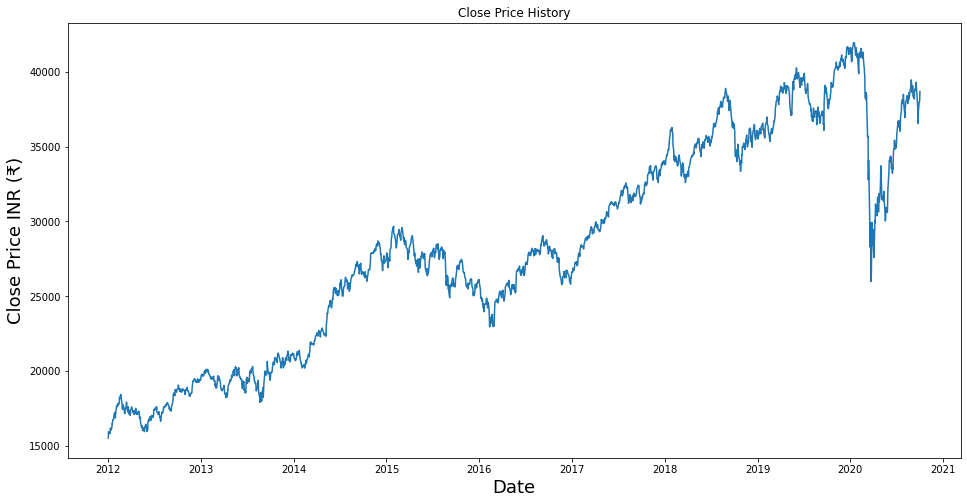

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR (₹)',fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 
training_data_len

1716

In [6]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.        ],
       [0.01594269],
       [0.013797  ],
       ...,
       [0.84946268],
       [0.85304551],
       [0.87684456]])

In [7]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [8]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1656, 60, 1)

In [10]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [11]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


Epoch 1/5
1656/1656 [==============================] - 43s 26ms/step - loss: 0.0010
Epoch 2/5
1656/1656 [==============================] - 43s 26ms/step - loss: 5.0741e-04
Epoch 3/5
1656/1656 [==============================] - 44s 27ms/step - loss: 3.3496e-04 0s - loss: 
Epoch 4/5
1656/1656 [==============================] - 43s 26ms/step - loss: 2.5071e-04
Epoch 5/5
1656/1656 [==============================] - 44s 27ms/step - loss: 2.4239e-04


In [13]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [14]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [15]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(429, 60, 1)

In [16]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [17]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

554.5506814094429

C:\Users\shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


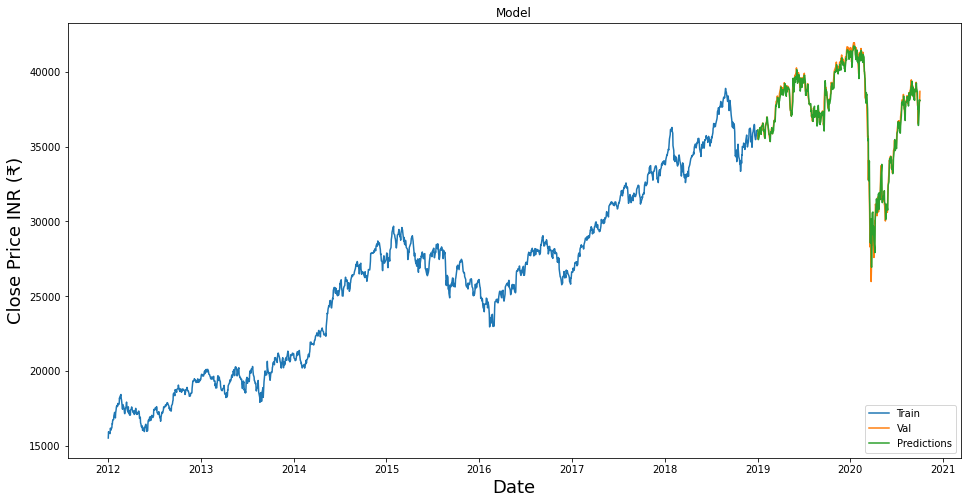

In [18]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (₹)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [19]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-01-02,35891.519531,36124.128906
2019-01-03,35513.710938,35893.406250
2019-01-04,35695.101562,35467.925781
2019-01-07,35850.160156,35660.292969
2019-01-08,35980.929688,35882.855469
...,...,...
2020-09-25,37388.660156,36415.433594
2020-09-28,37981.628906,37346.921875
2020-09-29,37973.218750,38128.382812


In [23]:
#Get the quote
sensex_quote = web.DataReader('^BSESN', data_source='yahoo', start='2012-01-01', end='2020-10-04')
#Create a new dataframe
new_df = sensex_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print('Closing price predicted for the next day')
print(pred_price)

Closing price predicted for the next day
[[38735.74]]


In [24]:
sensex_quote2 = web.DataReader('^BSESN', data_source='yahoo', start='2020-10-05', end='2020-10-05')
print('Actual closing price:')
print(sensex_quote2['Close'])

Actual closing price:
Date
2020-10-05    38973.699219
Name: Close, dtype: float64


Succesfully created a LSTM model to predict the closing price of **SENSEX**

## Part 2
Textual Analysis for Stock prediction using **sentiment analysis and Naive Bayes model**

In [26]:
df_text = pd.read_csv('india-news-headlines.csv')
df_text.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [27]:
df_text['headline_category'].unique()

array(['sports.wwe', 'unknown', 'entertainment.hindi.bollywood', ...,
       'elections.assembly-elections.delhi-assembly-elections',
       'elections.assembly-elections.delhi', 'life-style.coronavirus'],
      dtype=object)

Created a new dataframe which only contains news headlines for **SENSEX**

In [28]:
df_new = df_text[df_text['headline_text'].str.contains('sensex', case=False)]

In [29]:
df_new = df_new.reset_index()

In [30]:
df_new = df_new.drop(['index'], axis =1)

In [31]:
df_new.head()

,publish_date,headline_category,headline_text
0,20010323,unknown,Rollercoaster: Sensex moves southwards
1,20010407,unknown,Sensex sheds early gains
2,20010411,unknown,Sensex under bear attack; drops to 23-month low
3,20010412,unknown,Sensex nosedives as Infy hints at tech slowdown
4,20010418,unknown,Sensex rises 61 points despite Infy-Sify drag


In [32]:
data = df_new.iloc[:,2:]
data

,headline_text
0,Rollercoaster: Sensex moves southwards
1,Sensex sheds early gains
2,Sensex under bear attack; drops to 23-month low
3,Sensex nosedives as Infy hints at tech slowdown
4,Sensex rises 61 points despite Infy-Sify drag
...,...
6772,Sensex soars nearly 1k pts as banks; fin stock...
6773,Sensex rallies 9% in 4 days as RIL; financial ...
6774,D-St ignores rating action; sensex gains
6775,D-Street discounts border clash; sensex ends i...


Removing all **characters** that are not required for analysis

In [33]:
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
data

,headline_text
0,Rollercoaster Sensex moves southwards
1,Sensex sheds early gains
2,Sensex under bear attack drops to month low
3,Sensex nosedives as Infy hints at tech slowdown
4,Sensex rises points despite Infy Sify drag
...,...
6772,Sensex soars nearly k pts as banks fin stock...
6773,Sensex rallies in days as RIL financial ...
6774,D St ignores rating action sensex gains
6775,D Street discounts border clash sensex ends i...


Converting everything into **LOWERCASE**

In [34]:
data['headline_text']=data['headline_text'].str.lower()
data

,headline_text
0,rollercoaster sensex moves southwards
1,sensex sheds early gains
2,sensex under bear attack drops to month low
3,sensex nosedives as infy hints at tech slowdown
4,sensex rises points despite infy sify drag
...,...
6772,sensex soars nearly k pts as banks fin stock...
6773,sensex rallies in days as ril financial ...
6774,d st ignores rating action sensex gains
6775,d street discounts border clash sensex ends i...


Defined a function to convert the given headline into **positive and negative sentiments**

In [35]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        return -1
    else:
        return 1

In [36]:
len(data)

6777

In [37]:
score=[]

Applying the function to the **headlines** in the dataset

In [38]:
for i in range(0, len(data)):
    x = sentiment_analyse(data['headline_text'][i])
    score.append(x)
    

In [39]:
score

[1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,


In [40]:
data['score'] = score

In [41]:
data['publish_date'] = df_new['publish_date']

In [42]:
data.publish_date.unique

<bound method Series.unique of 0       20010323
1       20010407
2       20010411
3       20010412
4       20010418
          ...   
6772    20200528
6773    20200602
6774    20200603
6775    20200617
6776    20200622
Name: publish_date, Length: 6777, dtype: int64>

In [43]:
data['score'].value_counts()

 1    5582
-1    1195
Name: score, dtype: int64

In [44]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(data['headline_text'])

In [45]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['score'], test_size=0.25, random_state=5)

Using **Naive Bayes**

In [46]:
from sklearn.naive_bayes import MultinomialNB

In [47]:
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [48]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)

In [50]:
print('The accuracy of the model:')
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

The accuracy of the model:
91.74%


Some more **metrics**

In [51]:
matrix=confusion_matrix(predicted, Y_test)
print(matrix)
report=classification_report(predicted, Y_test)
print(report)

[[ 211   63]
 [  77 1344]]
              precision    recall  f1-score   support

          -1       0.73      0.77      0.75       274
           1       0.96      0.95      0.95      1421

    accuracy                           0.92      1695
   macro avg       0.84      0.86      0.85      1695
weighted avg       0.92      0.92      0.92      1695

